In [1]:
import pandas as pd
from pandas_datareader import DataReader
import yfinance as yf
from datetime import datetime
stock_list = ["AAPL", "GOOG", "MSFT", "AMZN", "TSLA", "META","NFLX","NVDA"]
start_date = datetime(datetime.now().year - 1, 
                      datetime.now().month,
                      datetime.now().day)

end_date = datetime.now()

for stock in stock_list:
    df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, group_by="columns")
    if isinstance(df.columns,pd.MultiIndex):
        df.columns = [col[1] for col in df.columns.values]   
    globals()[stock] = df



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [2]:
print(META.describe())

             Open        High         Low       Close   Adj Close  \
count  250.000000  250.000000  250.000000  250.000000  250.000000   
mean   652.238159  659.850399  643.166161  651.570881  650.508632   
std     75.405243   74.354908   75.773639   74.837557   75.141862   
min    485.100006  493.500000  479.799988  484.660004  483.960724   
25%    589.829971  597.089996  581.837494  590.442490  588.591721   
50%    635.709991  644.929993  628.984985  640.170013  638.962372   
75%    717.462479  724.267471  710.837494  716.192490  715.420120   
max    791.150024  796.250000  780.820007  790.000000  789.467163   

             Volume  
count  2.500000e+02  
mean   1.399765e+07  
std    6.438897e+06  
min    4.726100e+06  
25%    9.584975e+06  
50%    1.242140e+07  
75%    1.621160e+07  
max    4.898940e+07  


In [3]:
print(META.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-10-08 to 2025-10-07
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB
None


<Axes: title={'center': 'GOOG Adjusted Close'}, xlabel='Date'>

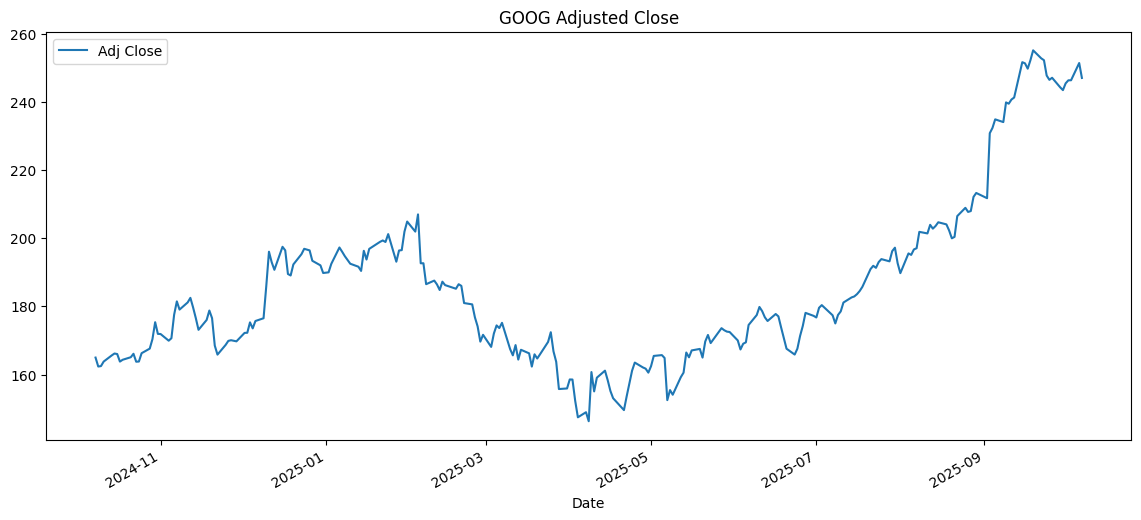

In [4]:
GOOG['Adj Close'].plot(figsize=(14,6), title="GOOG Adjusted Close", legend=True)

<Axes: title={'center': 'GOOG Volume'}, xlabel='Date'>

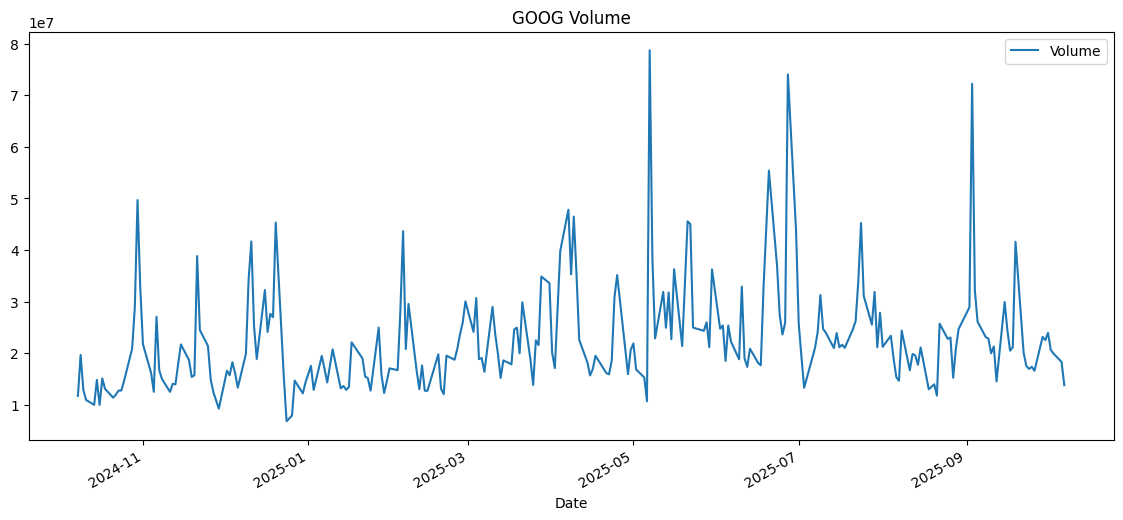

In [5]:
GOOG['Volume'].plot(legend=True, title="GOOG Volume", figsize=(14,6))

<Axes: title={'center': 'GOOG Adjusted Close with Moving Averages'}, xlabel='Date'>

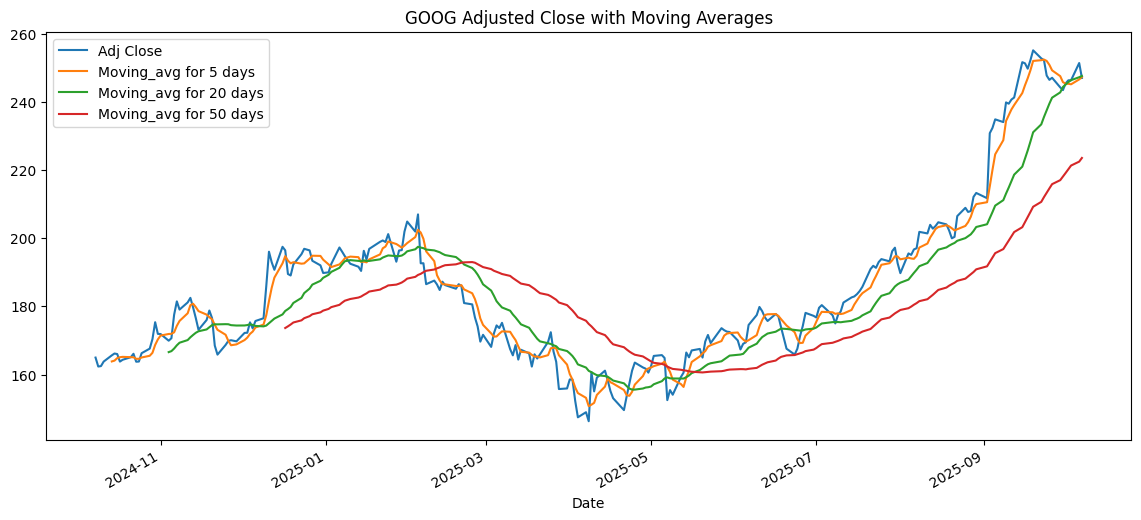

In [6]:
moving_avg_internvals = [5,20,50]

for moving_avg in moving_avg_internvals:
    column_name = "Moving_avg for %s days" %(str(moving_avg))
    GOOG[column_name] = GOOG['Adj Close'].rolling(moving_avg).mean()
    
GOOG[['Adj Close', 'Moving_avg for 5 days', "Moving_avg for 20 days", "Moving_avg for 50 days"]].plot(figsize =(14,6), title="GOOG Adjusted Close with Moving Averages", legend=True)

<Axes: title={'center': 'GOOG Daily Return'}, xlabel='Date'>

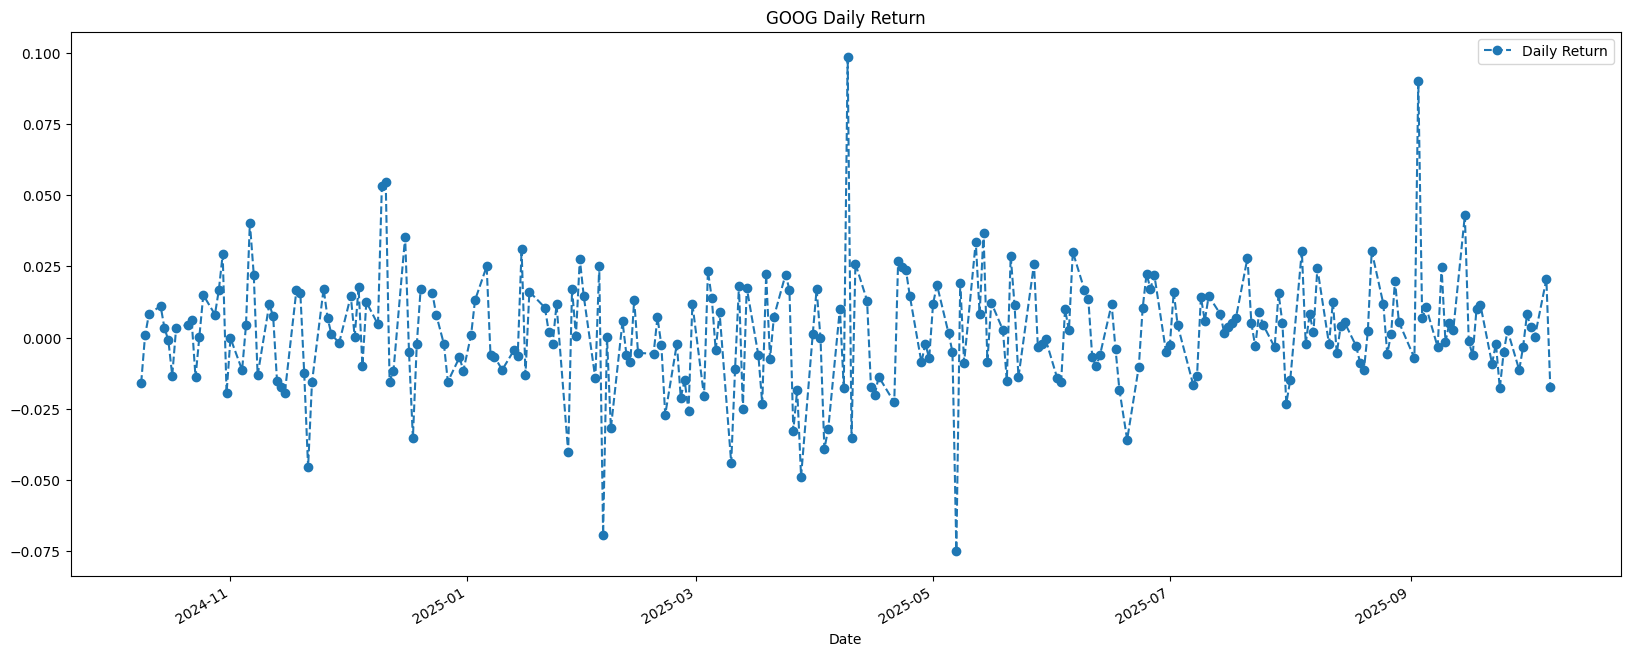

In [7]:
GOOG['Daily Return'] = GOOG['Adj Close'].pct_change()
GOOG['Daily Return'].plot(figsize=(20,8), legend=True,linestyle = '--',marker ='o', title="GOOG Daily Return")

In [8]:
#compare returns of different stocks

adj_closing_df = pd.DataFrame()

for stock in stock_list:
    df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, group_by="columns")
    if isinstance(df.columns,pd.MultiIndex):
        df.columns = [col[1] for col in df.columns.values]
    
    if 'Adj Close' in df.columns:
        adj_closing_df[stock] = df['Adj Close']
    else:
        print(f"Adjusted Close data not found for {stock}")

adj_closing_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,GOOG,MSFT,AMZN,TSLA,META,NFLX,NVDA
Date,,,,,,,,
2024-10-08,224.724136,164.977936,411.619751,182.720001,244.500000,591.031555,721.760010,132.851898
2024-10-09,228.476654,162.349442,414.349243,185.169998,241.050003,588.658997,727.429993,132.611969
2024-10-10,227.978973,162.468918,412.741302,186.649994,238.770004,581.999939,730.289978,134.771347
2024-10-11,226.495895,163.803101,413.217773,188.820007,217.800003,588.100830,722.789978,134.761368
2024-10-14,230.228516,165.625122,416.016724,187.539993,219.160004,588.569214,713.000000,138.030441


In [9]:
stocks_returns = adj_closing_df.pct_change()

stocks_returns

,AAPL,GOOG,MSFT,AMZN,TSLA,META,NFLX,NVDA
Date,,,,,,,,
2024-10-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-09,0.016698,-0.015932,0.006631,0.013408,-0.014110,-0.004014,0.007856,-0.001806
2024-10-10,-0.002178,0.000736,-0.003881,0.007993,-0.009459,-0.011312,0.003932,0.016283
2024-10-11,-0.006505,0.008212,0.001154,0.011626,-0.087825,0.010483,-0.010270,-0.000074
2024-10-14,0.016480,0.011123,0.006774,-0.006779,0.006244,0.000796,-0.013545,0.024258
...,...,...,...,...,...,...,...,...
2025-10-01,0.003220,0.008171,0.003398,0.004828,0.033144,-0.023203,-0.023371,0.003537
2025-10-02,0.006577,0.003625,-0.007639,0.008068,-0.051060,0.013536,-0.007148,0.008812
2025-10-03,0.003461,0.000081,0.003122,-0.013039,-0.014151,-0.022681,-0.007922,-0.006724


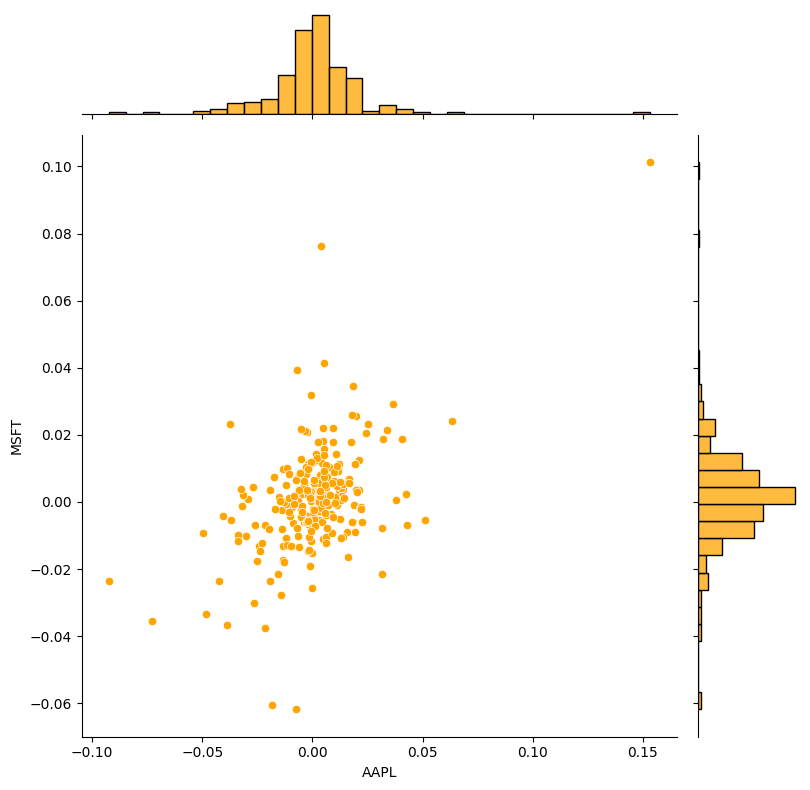

In [10]:
import seaborn as sns

sns.jointplot(x='AAPL', y='MSFT', data=stocks_returns, kind='scatter', height=8, color = 'Orange')

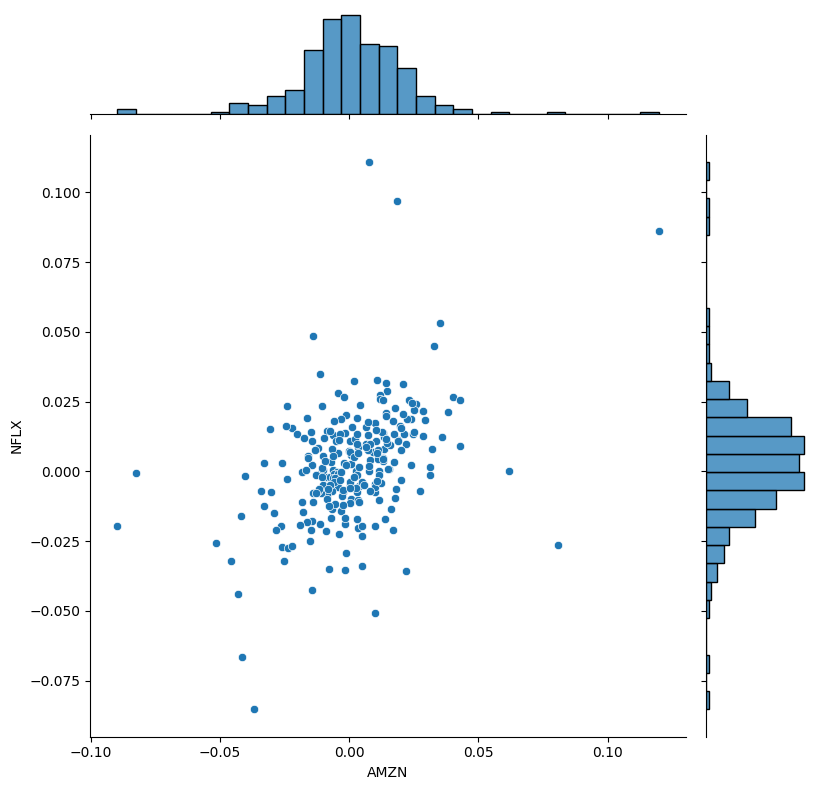

In [11]:
sns.jointplot(x='AMZN', y ='NFLX', data= stocks_returns, kind= 'scatter', height= 8)

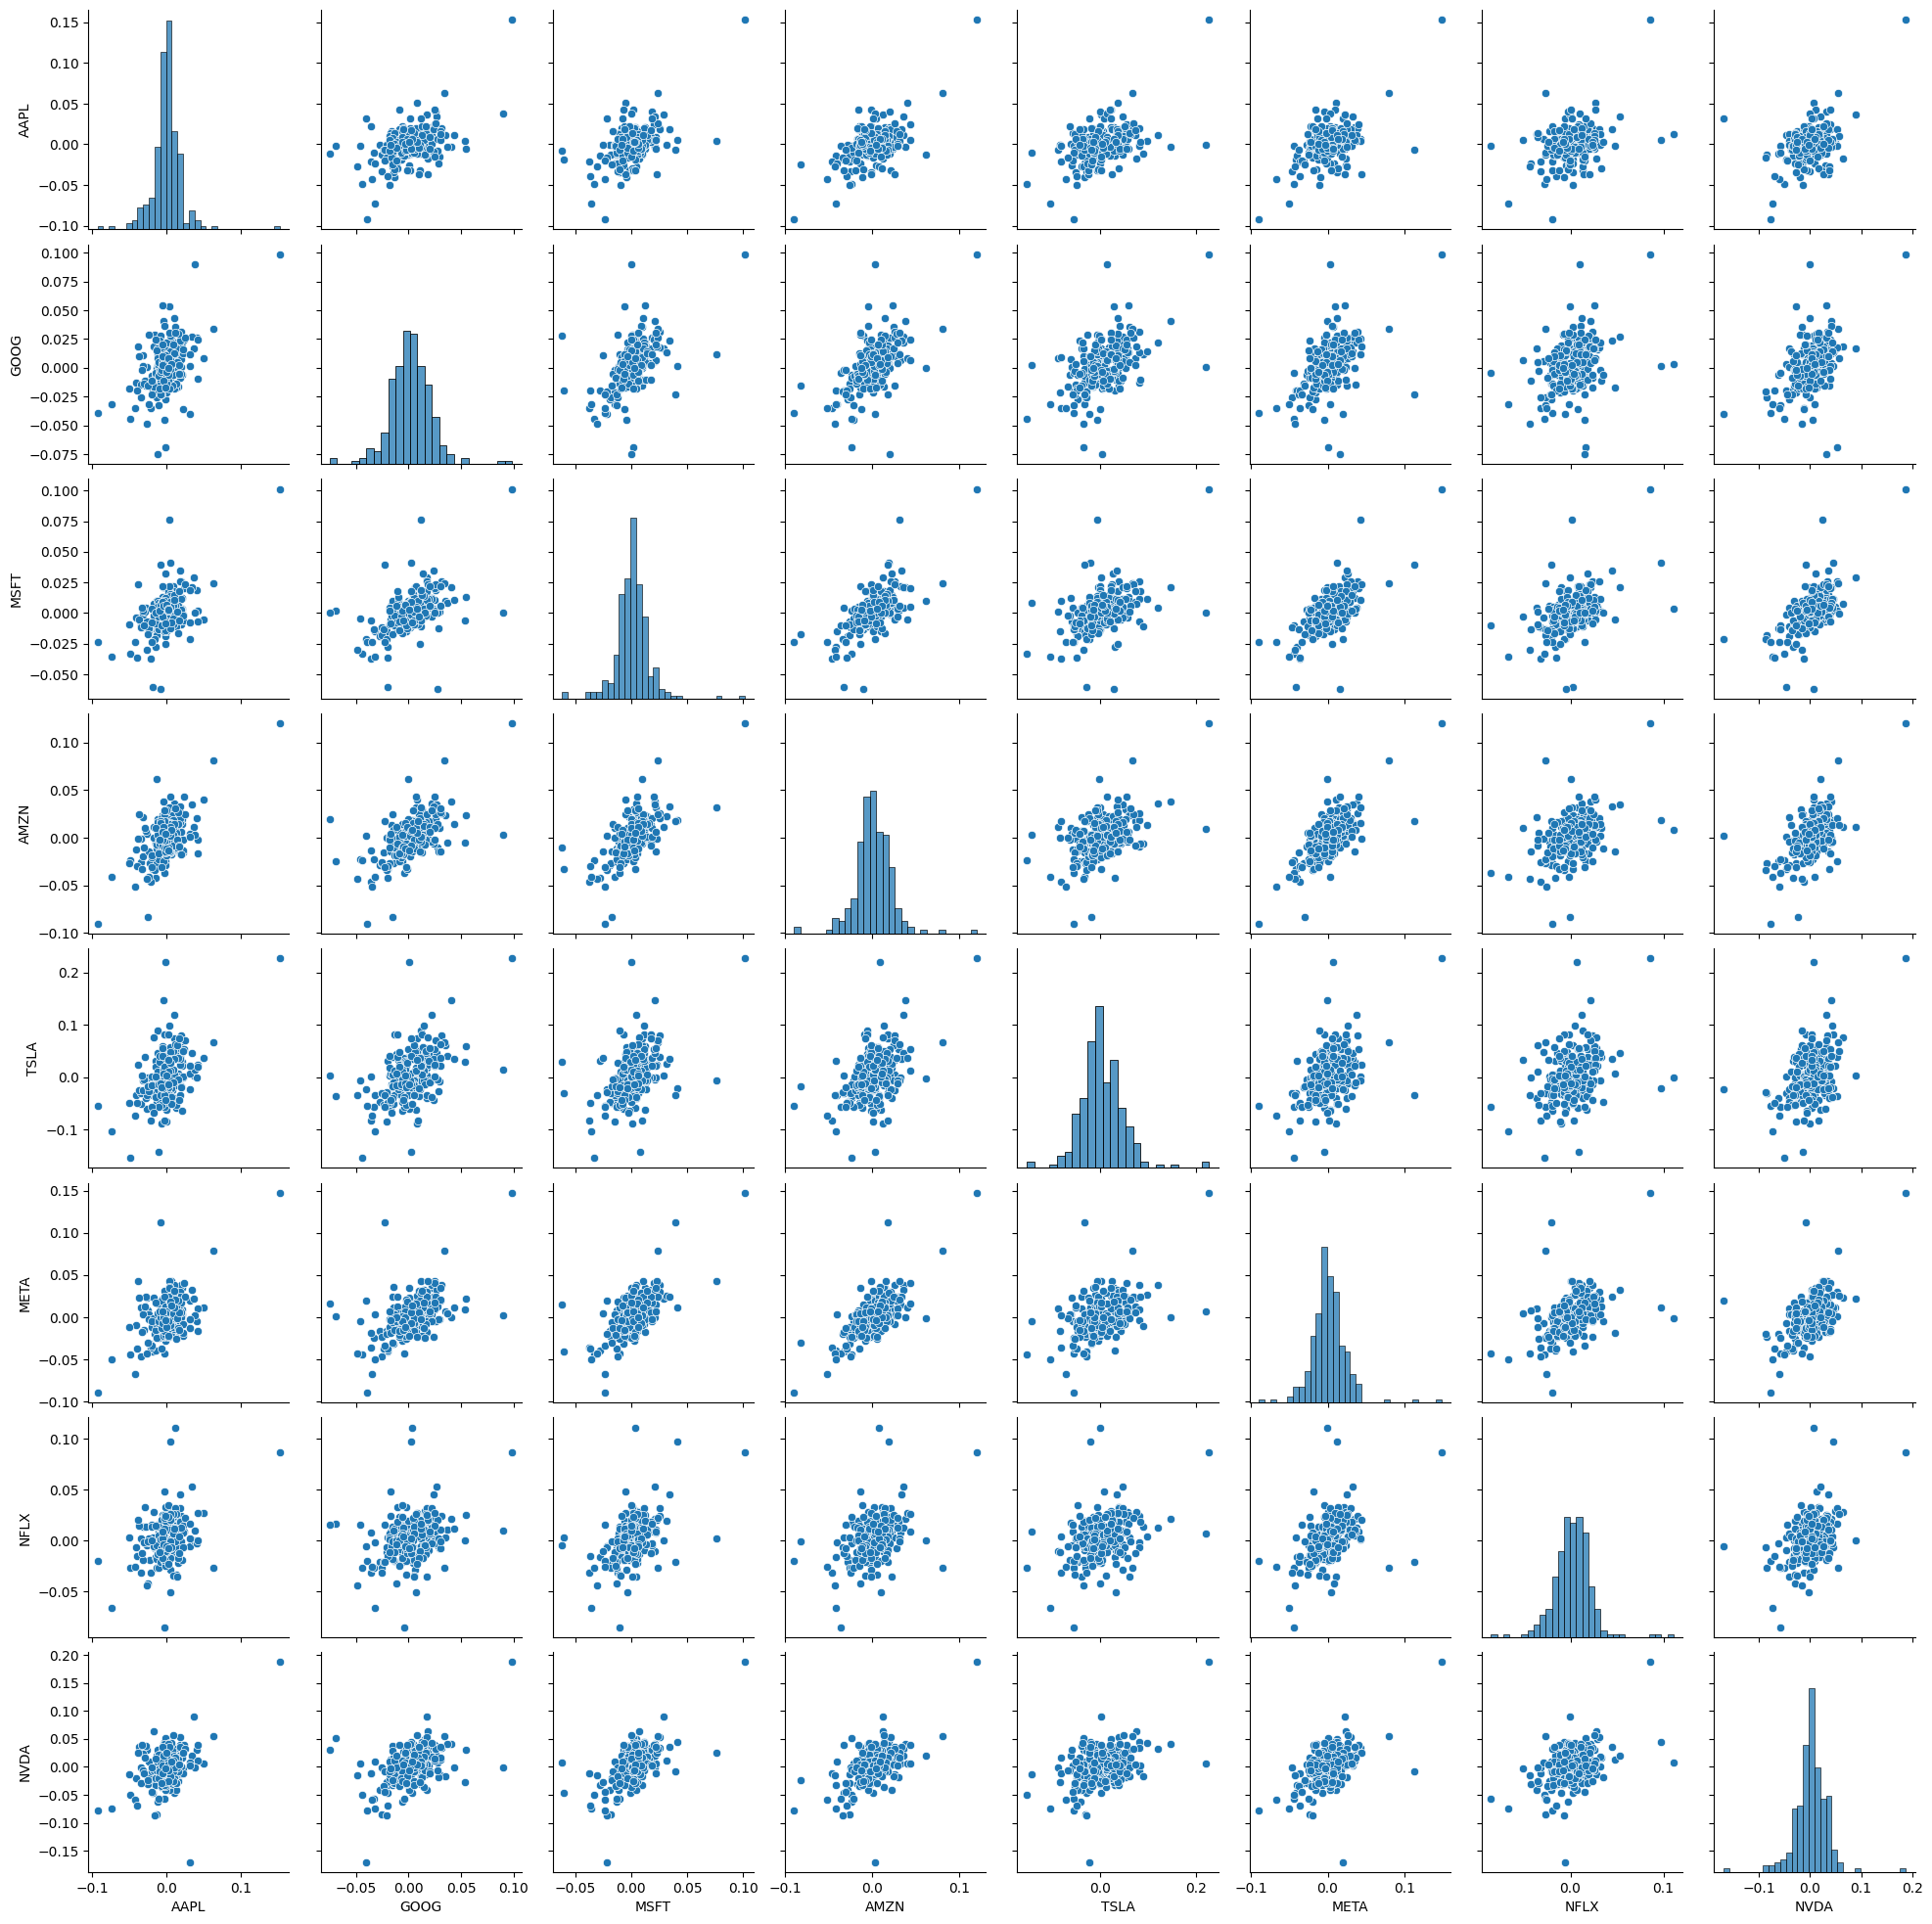

In [12]:
sns.pairplot(stocks_returns)

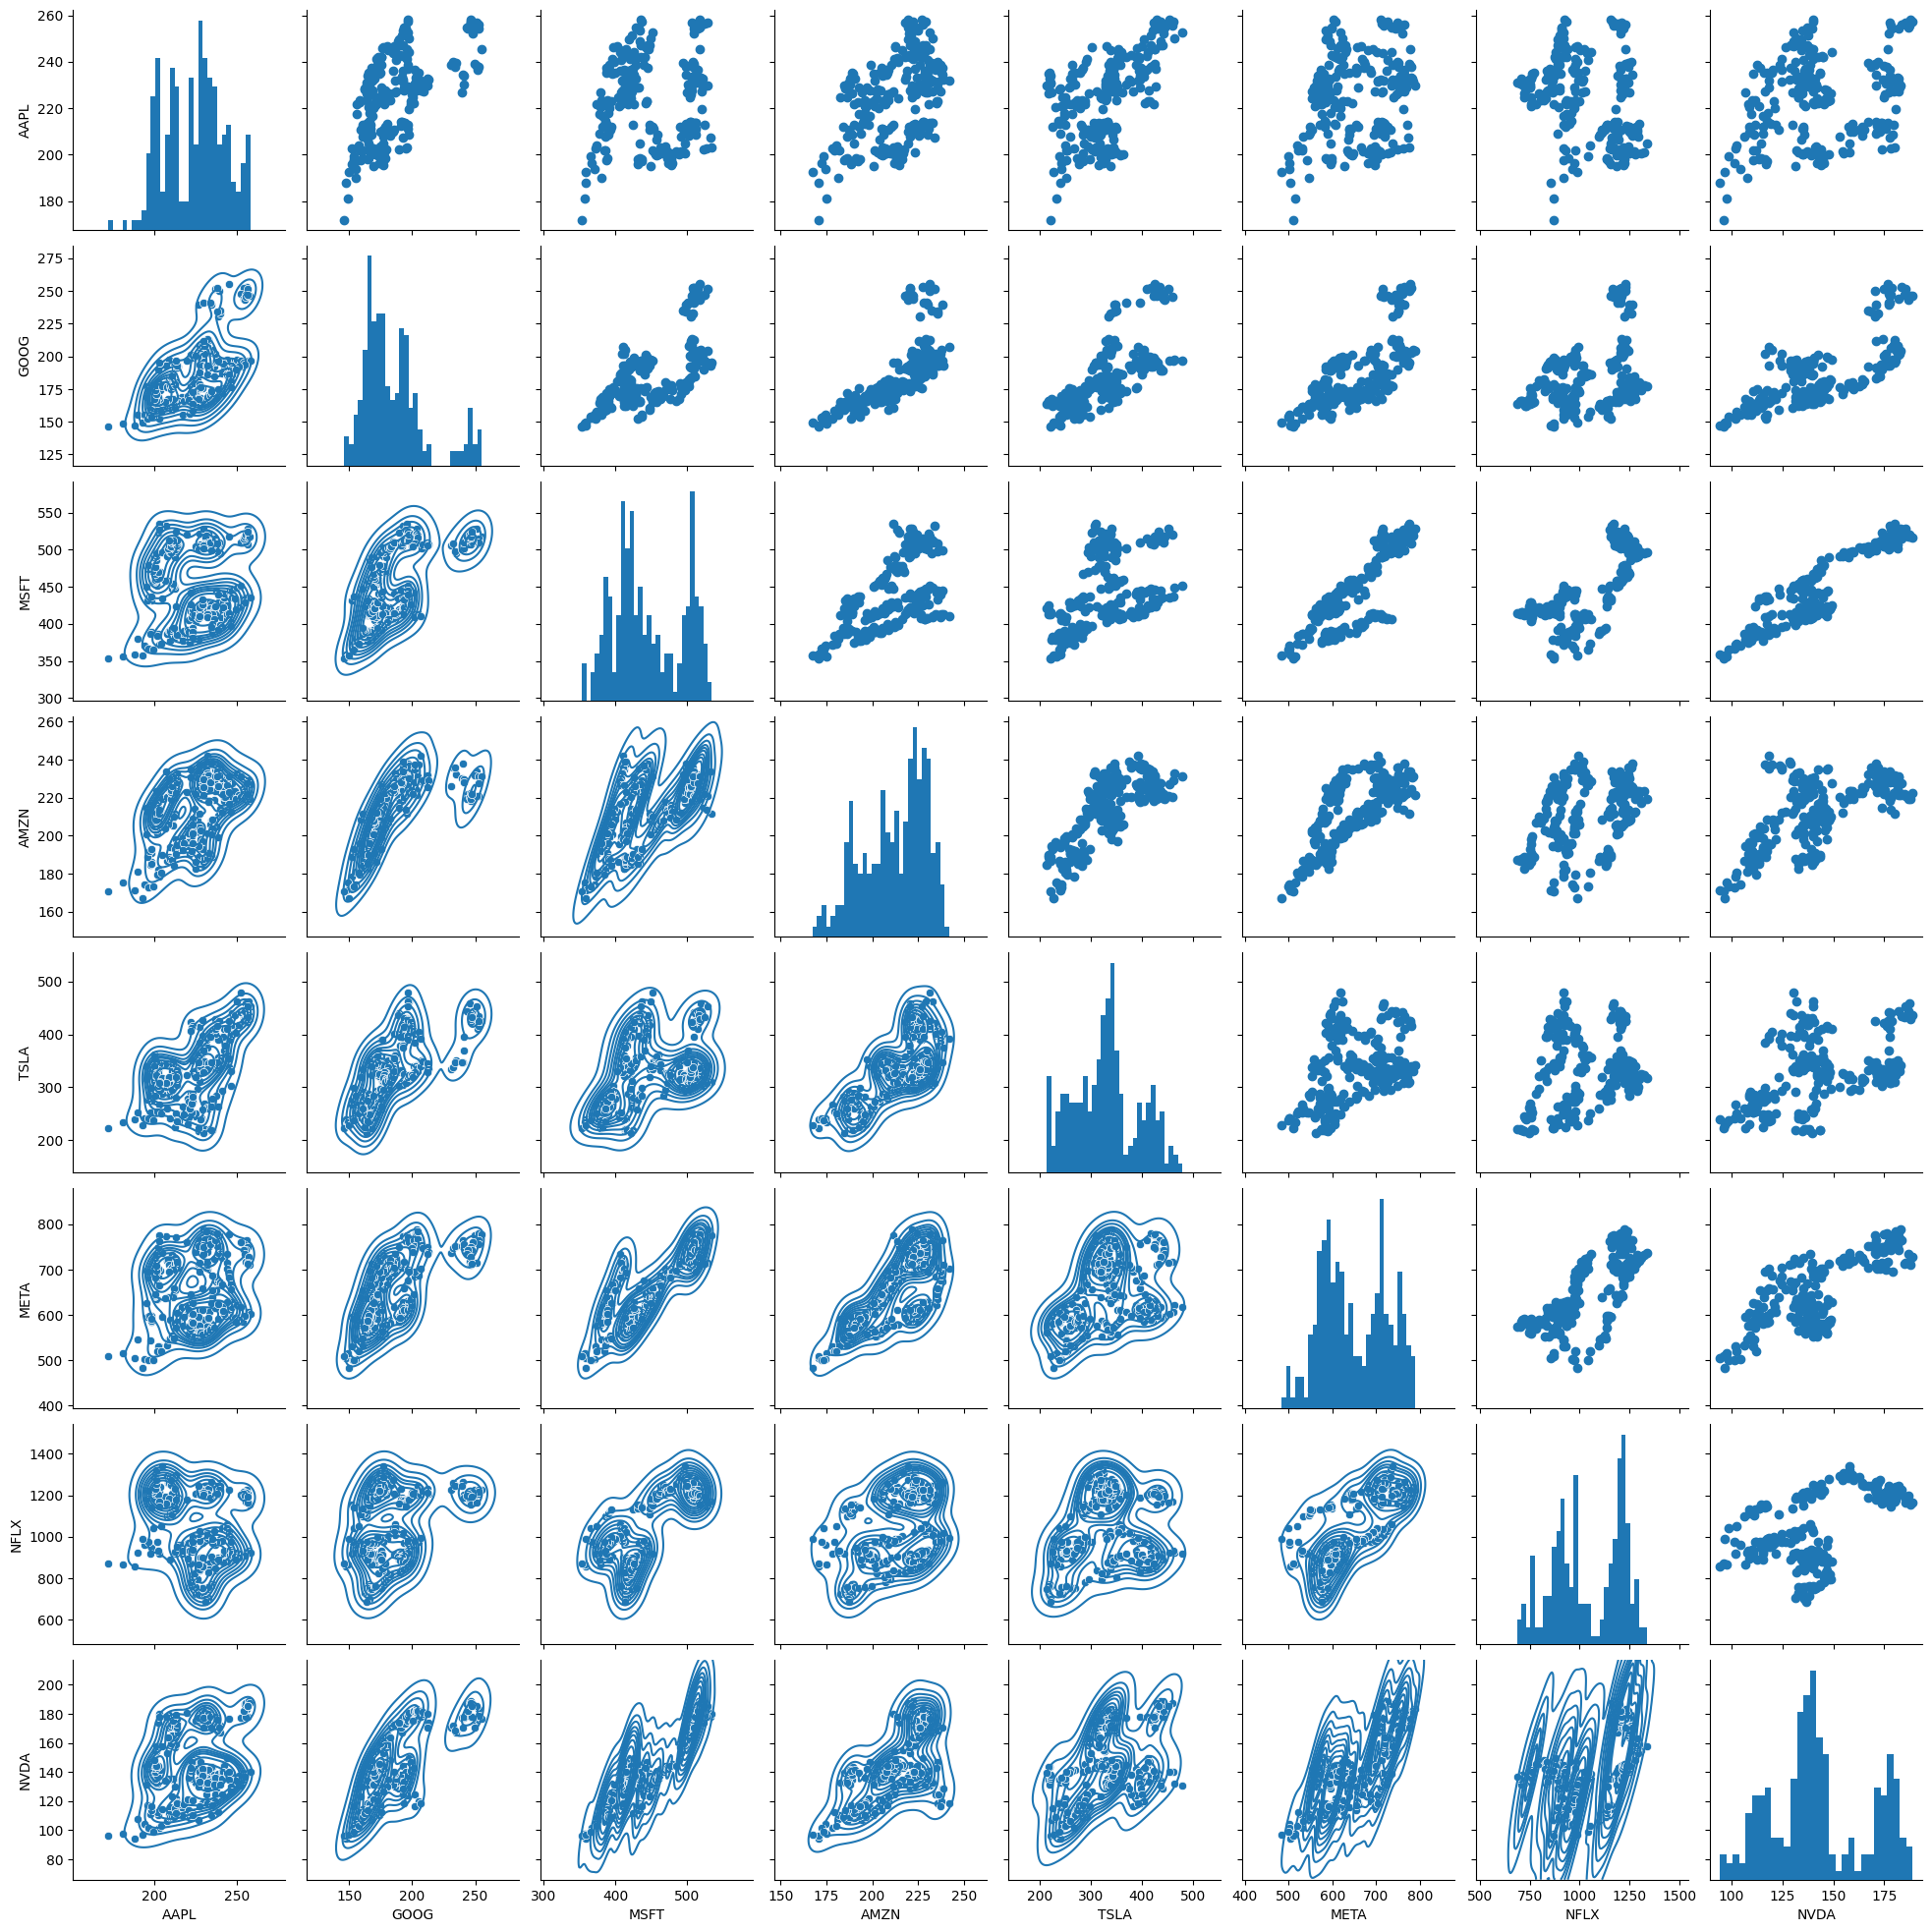

In [13]:
#compare closing prices of different stocks

return_figure = sns.pairplot(adj_closing_df, diag_kind= 'none')


import matplotlib.pyplot as plt

return_figure.map_upper(plt.scatter)
return_figure.map_diag(plt.hist, bins = 30)
return_figure.map_lower(sns.kdeplot,)


<Axes: >

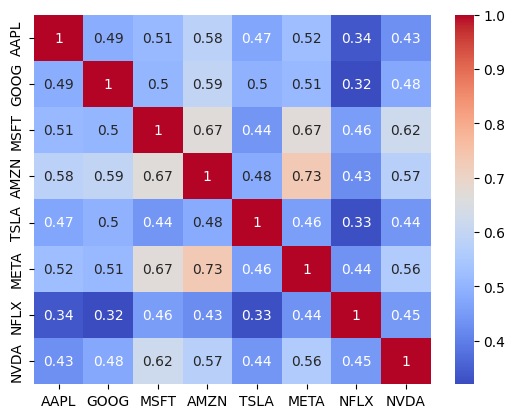

In [14]:
stocks_returns.corr()
sns.heatmap(stocks_returns.corr(), annot=True, cmap='coolwarm')

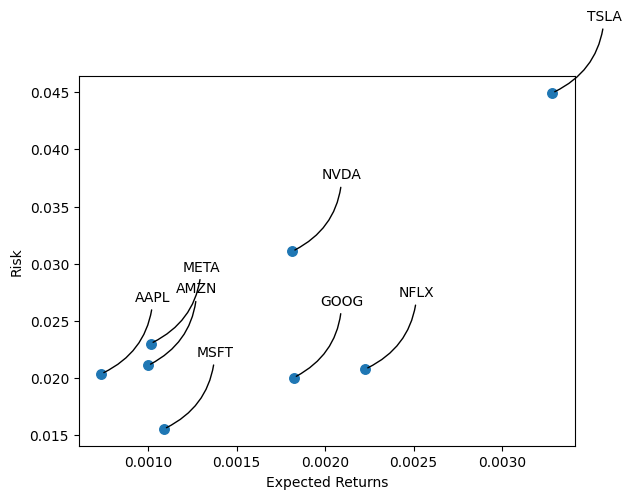

In [15]:
import numpy as np
returns = stocks_returns.dropna()
circles_area = np.pi * 15
plt.scatter(x = returns.mean(), y = returns.std(), s = circles_area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')


for label ,x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3')
    )

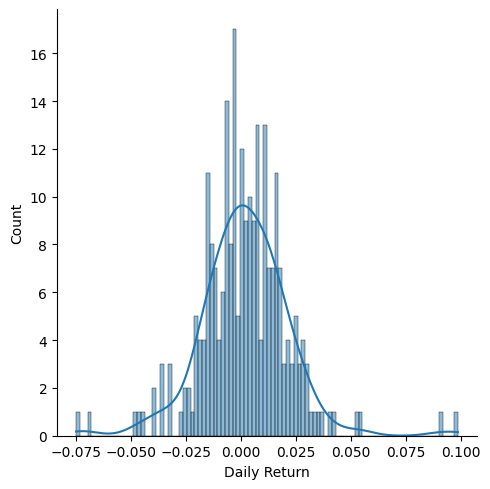

In [16]:
sns.displot(GOOG['Daily Return'].dropna(),bins = 100, kde = True)

In [17]:
returns.head()

,AAPL,GOOG,MSFT,AMZN,TSLA,META,NFLX,NVDA
Date,,,,,,,,
2024-10-09,0.016698,-0.015932,0.006631,0.013408,-0.014110,-0.004014,0.007856,-0.001806
2024-10-10,-0.002178,0.000736,-0.003881,0.007993,-0.009459,-0.011312,0.003932,0.016283
2024-10-11,-0.006505,0.008212,0.001154,0.011626,-0.087825,0.010483,-0.010270,-0.000074
2024-10-14,0.016480,0.011123,0.006774,-0.006779,0.006244,0.000796,-0.013545,0.024258
2024-10-15,0.011025,0.003306,-0.000954,0.000800,0.001871,-0.007029,-0.009846,-0.046860


In [18]:
returns['GOOG'].quantile(0.05)*100

np.float64(-2.9995044871900634)

In [19]:
returns['GOOG'].quantile(0.95)*100

np.float64(2.9741889238622883)

In [20]:
starting_price = GOOG['Adj Close'][-1]

C:\Users\shenx\AppData\Local\Temp\ipykernel_13096\1099293466.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  starting_price = GOOG['Adj Close'][-1]


In [21]:
# monte carlo analysis
days = 365
dt = 1/365
sigma = returns.std()['GOOG']
mu = returns.mean()['GOOG']

def monte_carlo_analysis(starting_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = starting_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    for day in range(1, days):
        shock[day] = np.random.normal(loc=mu * dt,
                                      scale  = sigma * np.sqrt(dt))
        drift[day] = mu * dt
        price[day] = price[ day -1] + (price[day -1] * (drift[day] + shock[day]))
    return price

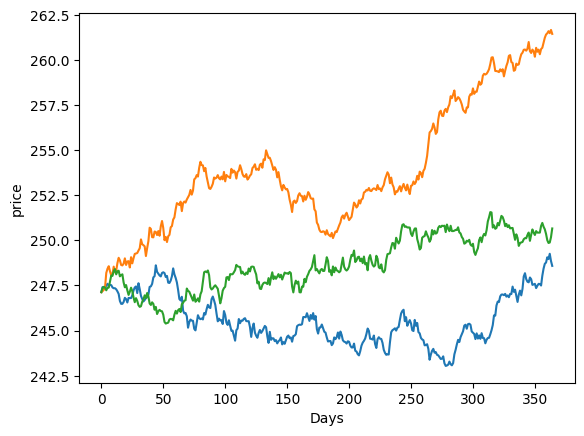

In [22]:
for run in range(3):
   price = monte_carlo_analysis(starting_price, days, mu, sigma)
   plt.plot(price)
   plt.xlabel('Days')
   plt.ylabel("price") 

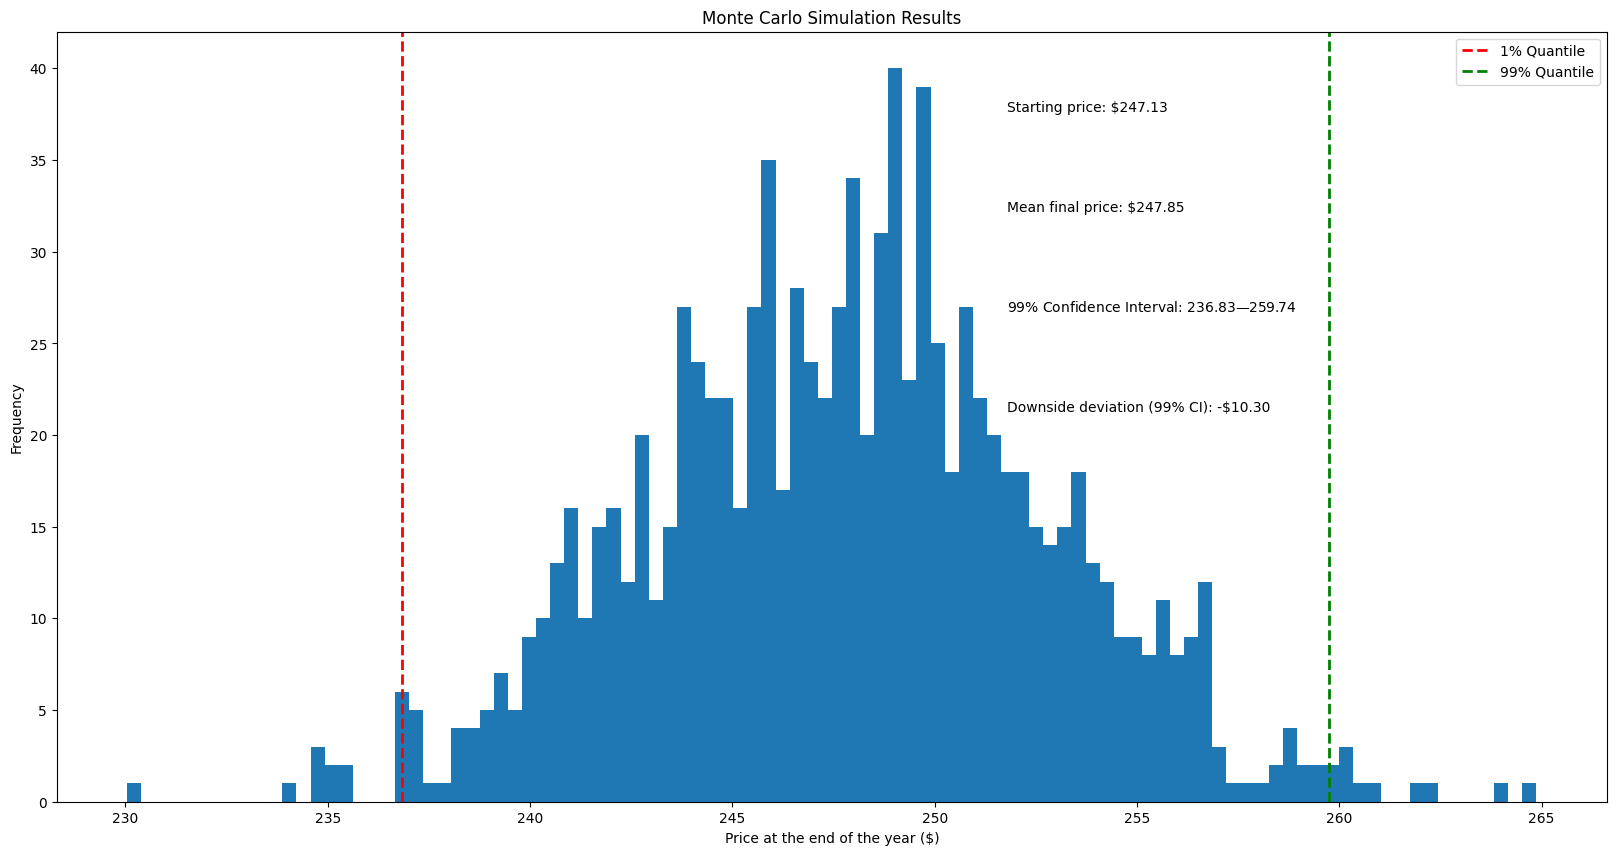

In [23]:

number_of_simulations = 1000
simulations = np.zeros(number_of_simulations)

for runs in range(number_of_simulations):
    simulations[runs] = monte_carlo_analysis(starting_price, 
                                             days, 
                                             mu, 
                                             sigma)[days -1]

plt.figure(figsize=(20, 10))
plt.hist(simulations, bins = 100)
plt.xlabel("Price at the end of the year ($)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation Results")

# --- Compute statistics ---
mean_price = np.mean(simulations)
low_1 = np.quantile(simulations, 0.01)   # 1% quantile (lower bound)
high_99 = np.quantile(simulations, 0.99) # 99% quantile (upper bound)
downside_deviation = starting_price - low_1  # how far price could drop (worst 1%)


# --- Annotate figure ---
plt.figtext(0.6, 0.8, s=f"Starting price: ${starting_price:.2f}")
plt.figtext(0.6, 0.7, s=f"Mean final price: ${mean_price:.2f}")
plt.figtext(0.6, 0.6, s=f"99% Confidence Interval: ${low_1:.2f} — ${high_99:.2f}")
plt.figtext(0.6, 0.5, s=f"Downside deviation (99% CI): -${downside_deviation:.2f}")

# --- Add visual markers for CI bounds ---
plt.axvline(x=low_1, color='red', linestyle='--', linewidth=2, label='1% Quantile')
plt.axvline(x=high_99, color='green', linestyle='--', linewidth=2, label='99% Quantile')
plt.legend()

plt.show()

In [24]:
#show latest date
import yfinance as yf
import pandas as pd
from datetime import datetime
def fetch_and_save_stock_data():
    stock_list =["AAPL", "MSFT"]
    start_date = datetime(datetime.now().year - 1,
    datetime.now().month,
    datetime.now().day)
    end_date = datetime.now()

    for stock in stock_list:
        df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, group_by="columns")
        
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [col[1] for col in df.columns.values]

        df.to_csv(f"%{stock}_data.csv",index = True)
        df = pd.read_csv(f"%{stock}_data.csv")
        print(f"{stock} closing prices: {df['Close'].iloc[-1]:.2f}")
        
        
fetch_and_save_stock_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL closing prices: 256.48
MSFT closing prices: 523.98


In [25]:
#display last 5 days
import yfinance as yf
import pandas as pd
from datetime import datetime

def fetch_and_display_closing_prices():
    stock_list =["AAPL", "MSFT"]
    start_date = datetime(datetime.now().year - 1,
    datetime.now().month,
    datetime.now().day)
    end_date = datetime.now()

    for stock in stock_list:
        df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, group_by="columns")
        
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [col[1] for col in df.columns.values]

        df.to_csv(f"%{stock}_data.csv",index = True)
        df = pd.read_csv(f"%{stock}_data.csv")
        last_5items = df['Close'].tail(5).tolist()
        for i,each in enumerate(last_5items):
            last_5items[i] = f"{each:.2f}"
            
        print(f"{stock} closing prices for last 5 days: {last_5items}")
        
fetch_and_display_closing_prices()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

AAPL closing prices for last 5 days: ['255.45', '257.13', '258.02', '256.69', '256.48']
MSFT closing prices for last 5 days: ['519.71', '515.74', '517.35', '528.57', '523.98']


In [26]:
#test
#display last 5 days
import yfinance as yf
import pandas as pd
from datetime import datetime

def fetch_and_display_closing_prices():
    stock_list =["S58.SI", "S59.SI","NVDA","AAPL"]
    start_date = datetime(datetime.now().year - 1,
    datetime.now().month,
    datetime.now().day)
    end_date = datetime.now()

    for stock in stock_list:
        df = yf.download(stock, start=start_date, end=end_date, auto_adjust=False, group_by="columns")
        
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = [col[1] for col in df.columns.values]

        df.to_csv(f"%{stock}_data.csv",index = True)
        df = pd.read_csv(f"%{stock}_data.csv")
        last_5items = df['Close'].tail(5).tolist()
        for i,each in enumerate(last_5items):
            last_5items[i] = f"{each:.2f}"
            
        print(f"{stock} closing prices for last 5 days: {last_5items}")
        
fetch_and_display_closing_prices()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

S58.SI closing prices for last 5 days: ['3.50', '3.53', '3.52', '3.51', '3.53']
S59.SI closing prices for last 5 days: ['3.48', '3.56', '3.61', '3.59', '3.63']
NVDA closing prices for last 5 days: ['187.24', '188.89', '187.62', '185.54', '185.04']


AAPL closing prices for last 5 days: ['255.45', '257.13', '258.02', '256.69', '256.48']
